# Social Data and Visualizations 

### importing needed libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim
import missingno as msno

### importing Natural Disasters data

In [2]:

Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [3]:

Natural_Disasters_Subtype = Natural_Disasters[(Natural_Disasters['Disaster Subtype']=='Drought')|(Natural_Disasters['Disaster Subtype']=='Heat wave')]
Natural_Disasters_Subtype_After_1990 =Natural_Disasters_Subtype[Natural_Disasters_Subtype['Year']>1990]
Natural_Disasters_Scope = Natural_Disasters_Subtype_After_1990[["Dis No",'Year','Disaster Subtype','Country', 'ISO', 'Region', 'Continent', 'Total Deaths',
        'No Injured', 'No Affected', 'No Homeless', 'Total Affected',"Total Damages ('000 US$)","Reconstruction Costs ('000 US$)"]]

### managing Nan values off totaly affected.

The logic will be that we will sum 'Total Deaths','No Injured', 'No Affected', 'No Homeless'and in case 'Total Affected' is Nan then we will assign that value


In [4]:
#Annua_freshwater_withdrawal_total

"""
mask = Natural_Disasters_Scope.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
"""

"\nmask = Natural_Disasters_Scope.isnull()\n\n\nplt.figure(figsize=(15, 20))\n\n\n# Create a heatmap of missing values\nsns.heatmap(mask, cmap='viridis', cbar=False)\nplt.title('Missing Values Heatmap')\nplt.show()\n"

the lines that do not have total affected values we consider that it is rhe sum of total deaths, no affected, no of injured and no of homeless.

In [5]:
Natural_Temp = Natural_Disasters_Scope
Temp1 = Natural_Disasters_Scope

# creates a new line that has the sum of 'Total Deaths','No Injured', 'No Homeless' if total affected is null
Temp1['New Affected'] = Temp1.loc[ Temp1['Total Affected'].isnull(),[ 'Total Deaths','No Injured', 'No Homeless']].sum(axis=1)
# convert zero values to nan
Temp1.loc[Temp1['New Affected'] <= 0, 'New Affected'] = np.nan
# fill total affected nan values with new affected values
Temp1.loc[Temp1['Total Affected'].isnull(), 'Total Affected'] = Temp1.loc[Temp1['Total Affected'].isnull(), 'New Affected']
"""
mask = Temp1.isnull()
mask = mask.drop(["Total Damages ('000 US$)","Reconstruction Costs ('000 US$)"], axis=1)


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
"""

<ipython-input-5-9bfd5f9d24a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp1['New Affected'] = Temp1.loc[ Temp1['Total Affected'].isnull(),[ 'Total Deaths','No Injured', 'No Homeless']].sum(axis=1)
D:\Apps\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Apps\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

'\nmask = Temp1.isnull()\nmask = mask.drop(["Total Damages (\'000 US$)","Reconstruction Costs (\'000 US$)"], axis=1)\n\n\nplt.figure(figsize=(15, 20))\n\n\n# Create a heatmap of missing values\nsns.heatmap(mask, cmap=\'viridis\', cbar=False)\nplt.title(\'Missing Values Heatmap\')\nplt.show()\n'

remove unecessery rows

In [6]:
Temp1 = Temp1.drop(['New Affected','No Injured','No Homeless',"Total Damages ('000 US$)","Reconstruction Costs ('000 US$)"], axis=1)

"""
mask = Temp1.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
"""

"\nmask = Temp1.isnull()\n\n\nplt.figure(figsize=(15, 20))\n\n\n# Create a heatmap of missing values\nsns.heatmap(mask, cmap='viridis', cbar=False)\nplt.title('Missing Values Heatmap')\nplt.show()\n"

In [7]:
Natural_Disasters_Scope = Temp1

grouping data based on county and Year.

count indices

In [8]:

instances = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Dis No'].count().reset_index()

compute total affected

In [9]:

Total_affected = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Total Affected'].sum().reset_index()

In [10]:

Total_deaths = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Total Deaths'].sum().reset_index()

combining the three groupings

In [11]:
Natural_Disasters_Scope =  pd.merge(instances,Total_deaths, on =['ISO','Year','Disaster Subtype', 'Region', 'Continent'])
Natural_Disasters_Scope =  pd.merge(Natural_Disasters_Scope,Total_affected, on =['ISO','Year','Disaster Subtype', 'Region', 'Continent'])

In [12]:
Natural_Disasters_Scope

,ISO,Year,Disaster Subtype,Region,Continent,Dis No,Total Deaths,Total Affected
0,AFG,2000,Drought,Southern Asia,Asia,1,37.0,2580000.0
1,AFG,2006,Drought,Southern Asia,Asia,1,0.0,1900000.0
2,AFG,2008,Drought,Southern Asia,Asia,1,0.0,280000.0
3,AFG,2011,Drought,Southern Asia,Asia,1,0.0,1750000.0
4,AFG,2018,Drought,Southern Asia,Asia,1,0.0,13500000.0
...,...,...,...,...,...,...,...,...
664,ZWE,2007,Drought,Eastern Africa,Africa,1,0.0,2100000.0
665,ZWE,2010,Drought,Eastern Africa,Africa,1,0.0,1667618.0
666,ZWE,2013,Drought,Eastern Africa,Africa,1,0.0,4300000.0
667,ZWE,2017,Drought,Eastern Africa,Africa,1,0.0,6900000.0


In [13]:
filtr = Natural_Disasters_Scope['ISO'].unique()

### importing energy consumption dataset

In [14]:
energy_consumption = pd.read_csv('primary-energy-cons.csv')

In [15]:
energy_consumption = energy_consumption[energy_consumption['Year']>1990 ] 
energy_consumption['ISO']=energy_consumption['Code']
energy_consumption

,Entity,Code,Year,Primary energy consumption (TWh),ISO
11,Afghanistan,AFG,1991,13.902764,AFG
12,Afghanistan,AFG,1992,9.167781,AFG
13,Afghanistan,AFG,1993,9.105348,AFG
14,Afghanistan,AFG,1994,8.815903,AFG
15,Afghanistan,AFG,1995,7.428904,AFG
...,...,...,...,...,...
12146,Zimbabwe,ZWE,2015,54.651080,ZWE
12147,Zimbabwe,ZWE,2016,46.665936,ZWE
12148,Zimbabwe,ZWE,2017,45.936050,ZWE
12149,Zimbabwe,ZWE,2018,47.502068,ZWE


In [16]:
GDP_absolut = pd.read_excel('GDP_absolut.xls')

In [17]:

pd.set_option('display.float_format', lambda x: f'{x:.3f}')

### Importing the rest of the datasets 

In [18]:
def data_clean(name = 'GDP_per_capita'):

    GDP_per_capita_raw = pd.read_excel(name + '.xls')
    GDP_per_capita_raw.drop(['Unnamed: 2','Unnamed: 3',], axis='columns', inplace=True)
    GDP_per_capita_raw.drop([0,1], axis='rows', inplace=True)
    GDP_per_capita_renamed = GDP_per_capita_raw
    GDP_per_capita_renamed.columns = GDP_per_capita_renamed.iloc[0]
    GDP_per_capita_renamed.drop([2], axis='rows', inplace=True)
    GDP_per_capita = GDP_per_capita_renamed.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name=name)
    GDP_per_capita['Year'] = GDP_per_capita['Year'].astype(int)
    final = GDP_per_capita[GDP_per_capita["Year"]>1990]
    return final

In [19]:
GDP_per_capita = data_clean(name = 'GDP_per_capita')
GDP_absolut = data_clean(name = 'GDP_absolut')
GDP_agriculture = data_clean(name = 'GDP_agriculture')
GDP_exports = data_clean(name = 'GDP_exports')
GDP_industry = data_clean(name = 'GDP_industry')
Imports_percent_GDP = data_clean(name = 'Imports_percent_GDP')
Cerial_Yields = data_clean(name = 'Cerial_Yields')
Annua_freshwater_withdrawal_total = data_clean(name = 'Annua_freshwater_withdrawal_total')
Agriculture_irrigated_Land = data_clean(name = 'Agriculture_irrigated_Land')
Agricultural_Land = data_clean(name = 'Agricultural_Land')
Arable_Land_Percentage = data_clean(name = 'Arable_Land_Percentage')
income_1_of_the_highest_fifth = data_clean(name = 'income_1_of_the_highest_20%')
income_2_of_the_second_fifth = data_clean(name = 'income_2_of_the_second_20%')
income_3_of_the_third_fifth = data_clean(name = 'income_3_of_the_third_20%')
income_4_of_the_fourth_fifth = data_clean(name = 'income_4_of_the_fourth_20%')
income_5_of_the_lowest_fifth = data_clean(name = 'income_5_of_the_lowest_20%')
Poverty_headcount_ratio = data_clean(name = 'Poverty_headcount_ratio')
# income_3_of_the_third_20%

Financial_Dataset = pd.merge(GDP_per_capita,Cerial_Yields, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_absolut, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_agriculture, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_exports, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_industry, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Imports_percent_GDP, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Annua_freshwater_withdrawal_total, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Agriculture_irrigated_Land, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Agricultural_Land , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Arable_Land_Percentage , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_1_of_the_highest_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_2_of_the_second_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_3_of_the_third_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_4_of_the_fourth_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_5_of_the_lowest_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Poverty_headcount_ratio , on =['Country Name','Country Code','Year'])



In [20]:
print(Financial_Dataset['Country Code'].unique())

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV'
 'CRI' 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST'
 'ETH' 'EUU' 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC'
 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX'
 'IMN' 'IND' 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN'
 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU'
 'LUX' 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL'
 'MIC' 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'M

In [21]:

#Annua_freshwater_withdrawal_total
FD = Financial_Dataset[Financial_Dataset['Country Code']=='AUT']
mask = FD.isnull()

"""
plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
"""


"\nplt.figure(figsize=(15, 20))\n\n\n# Create a heatmap of missing values\nsns.heatmap(mask, cmap='viridis', cbar=False)\nplt.title('Missing Values Heatmap')\nplt.show()\n"

In [22]:
Financial_Dataset = Financial_Dataset.loc[Financial_Dataset['Country Code'].isin(filtr)]

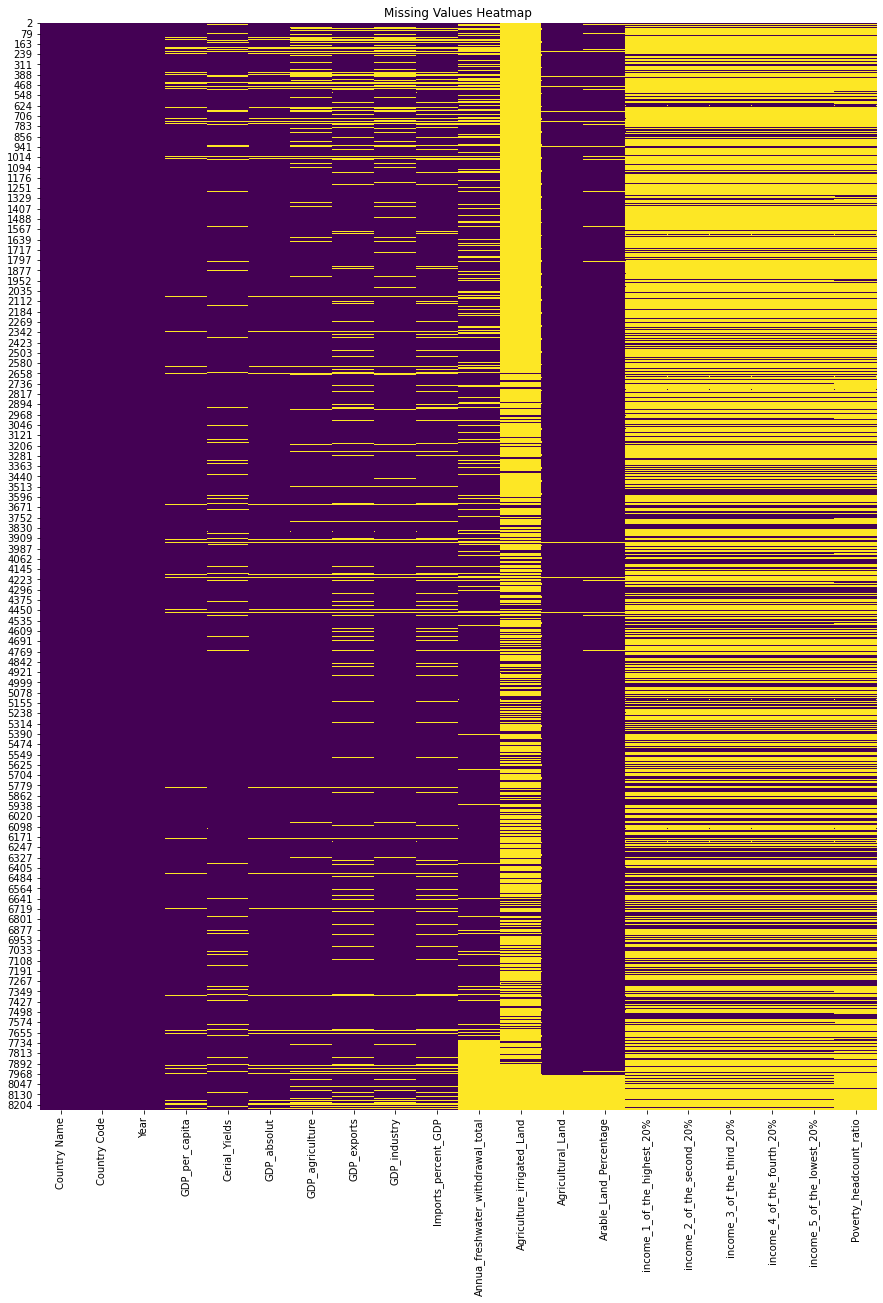

In [23]:
FD = Financial_Dataset
mask = FD.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()



In [24]:
Financial_Dataset['ISO']= Financial_Dataset['Country Code']

In [25]:
Financial_Dataset.drop(['Country Code'],axis =1)

,Country Name,Year,GDP_per_capita,Cerial_Yields,GDP_absolut,GDP_agriculture,GDP_exports,GDP_industry,Imports_percent_GDP,Annua_freshwater_withdrawal_total,Agriculture_irrigated_Land,Agricultural_Land,Arable_Land_Percentage,income_1_of_the_highest_20%,income_2_of_the_second_20%,income_3_of_the_third_20%,income_4_of_the_fourth_20%,income_5_of_the_lowest_20%,Poverty_headcount_ratio,ISO
2,Afghanistan,1991,nan,1160.400,nan,nan,nan,nan,nan,23.990,nan,58.308,12.128,nan,nan,nan,nan,nan,nan,AFG
4,Angola,1991,867.123,417.500,10603784541.197,nan,nan,nan,nan,0.529,nan,36.547,2.366,nan,nan,nan,nan,nan,nan,AGO
5,Albania,1991,336.587,2071.900,1099559027.778,nan,7.485,nan,28.586,1.192,nan,41.131,21.095,nan,nan,nan,nan,nan,nan,ALB
9,Argentina,1991,5730.724,2433.100,189719984268.485,6.716,7.675,32.723,6.078,28.373,nan,46.648,9.749,52.500,9.100,13.300,20.300,4.800,1.000,ARG
10,Armenia,1991,572.162,nan,2069870129.870,nan,40.745,nan,60.120,nan,nan,41.096,nan,nan,nan,nan,nan,nan,nan,ARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8237,Vietnam,2021,3756.489,5947.100,366137590600.699,12.560,93.292,37.476,93.177,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,VNM
8240,Samoa,2021,3857.318,nan,843842416.462,9.854,11.687,11.131,49.207,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,WSM
8243,South Africa,2021,7055.045,5124.700,419015018371.887,2.468,31.194,24.504,25.024,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ZAF
8244,Zambia,2021,1137.344,2525.000,22147634727.358,3.393,52.078,42.502,33.914,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ZMB


In [26]:
Temp_matrix = pd.merge(Financial_Dataset,Natural_Disasters_Scope, on =['ISO','Year'])
Temp_matrix = Temp_matrix.replace(0,np.nan)

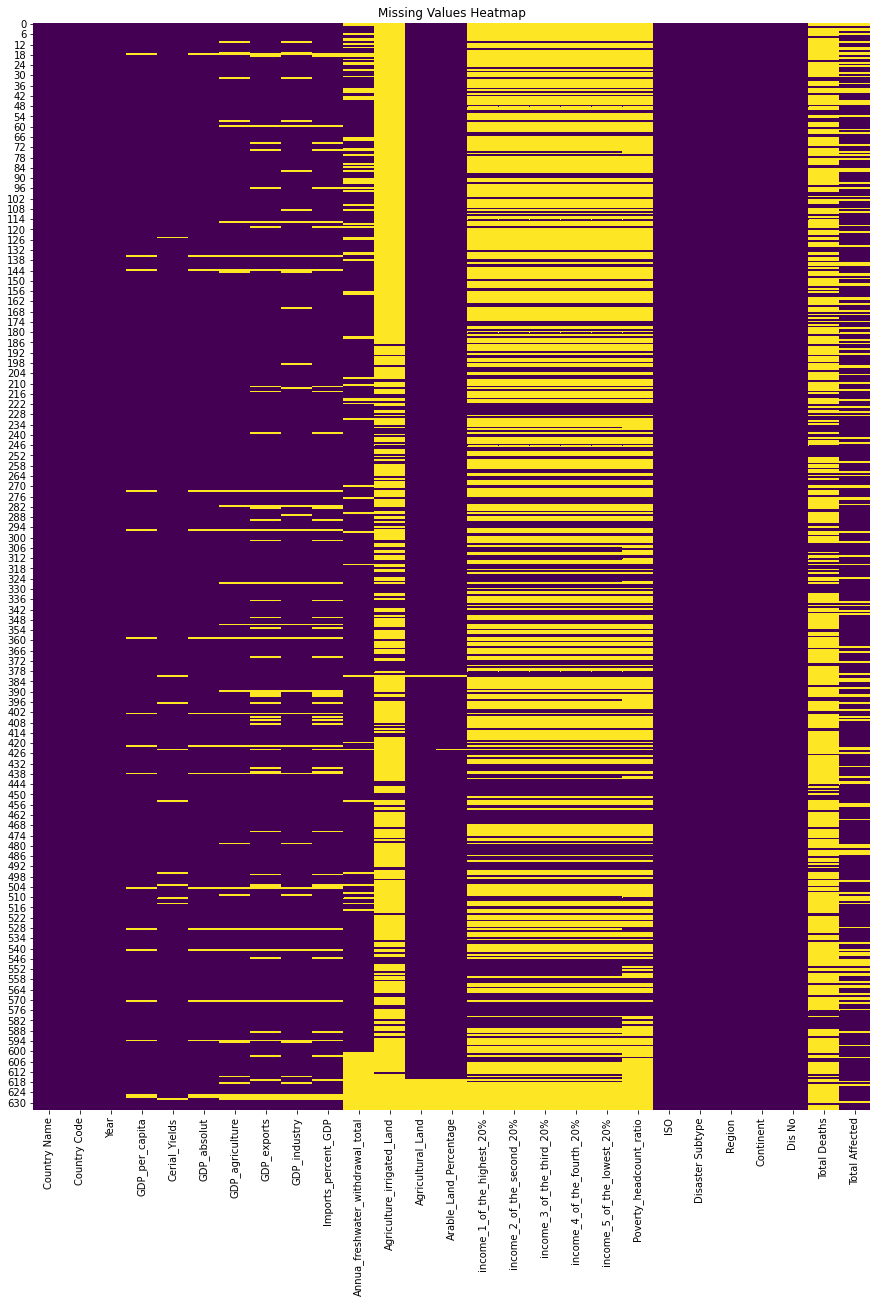

In [27]:
FD = Temp_matrix
mask = FD.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [28]:
Death_dataset = Temp_matrix.drop(['Agriculture_irrigated_Land'], axis=1)
Death_dataset = Death_dataset.dropna()



In [29]:
len(Death_dataset)

71

In [30]:
Death_dataset_Ex_Poverty = Temp_matrix.drop(['Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)
Death_dataset_Ex_Poverty = Death_dataset_Ex_Poverty.dropna()

In [31]:
len(Death_dataset_Ex_Poverty)

82

In [32]:
Affected_dataset = Temp_matrix.drop(["Total Deaths",'Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)


In [33]:
len(Affected_dataset)

635

In [34]:
Instances = Temp_matrix.drop(["Total Affected","Total Deaths",'Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)
Instances = Instances.dropna()
len(Instances)

217

## Analysis on Affected dataset

normalize total affected

In [35]:
Affected_dataset['Population'] = Affected_dataset['GDP_absolut']/Affected_dataset['GDP_per_capita']

In [36]:
Affected_dataset['Total Affected normalized'] = Affected_dataset['Total Affected']/Affected_dataset['Population']

In [37]:
Affected_dataset.loc[Affected_dataset['Region']=='Southern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Western Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Northern Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Southern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='South-Eastern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='South America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Southern America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Northern America','Region'] ='Northern America'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Western Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Central Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Central America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Western Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Northern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Southern Africa','Region'] ='Africa'

In [38]:
Affected_dataset['Region'].unique()

array(['Australia and New Zealand', 'South America', 'Asia', 'Europe',
       'Africa', 'Northern America', 'Caribbean', 'Middle Africa',
       'Melanesia', 'Micronesia', 'Polynesia'], dtype=object)

In [39]:
colours = {'Asia' : 'green', 'Africa':'blue', 'Northern America': 'red', 'South America':'purple', 'Europe':'yellow','Australia and New Zealand':'orange'}
clrs = ['green','blue', 'red', 'purple', 'yellow','orange']

In [40]:

Affected_dataset_messy = Affected_dataset
Affected_dataset = Affected_dataset.dropna()

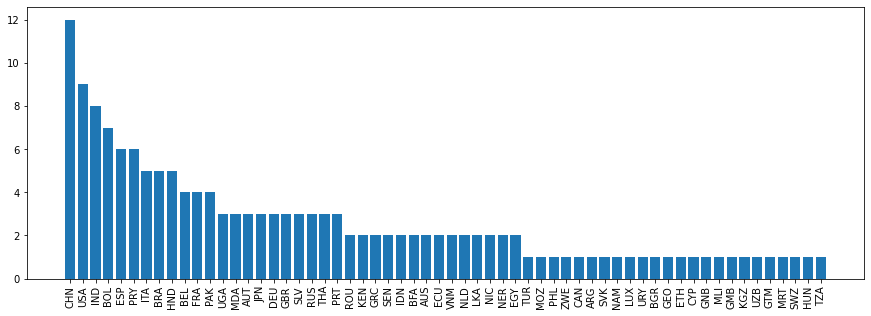

In [41]:
Countries = Affected_dataset['ISO'].value_counts()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)

plt.show()

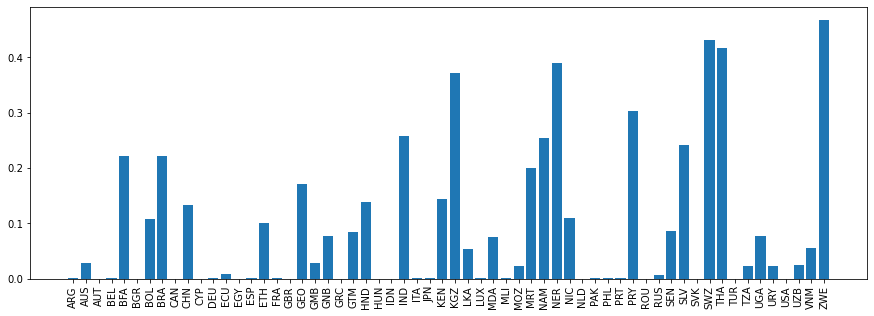

In [42]:
Countries = Affected_dataset.groupby('ISO')['Total Affected normalized'].sum()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)

plt.show()

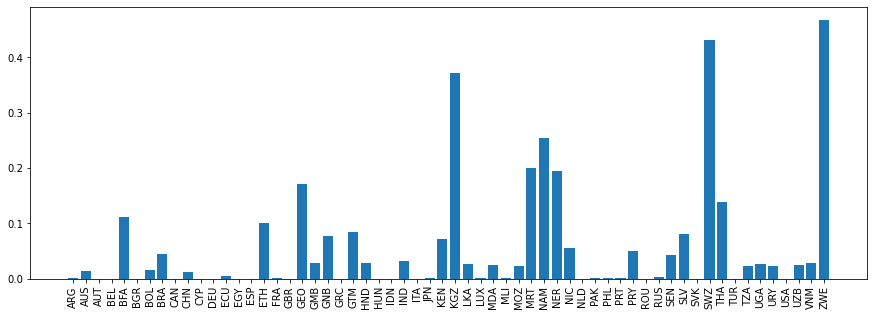

In [43]:
Countries = Affected_dataset.groupby('ISO')['Total Affected normalized'].mean()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)

plt.show()

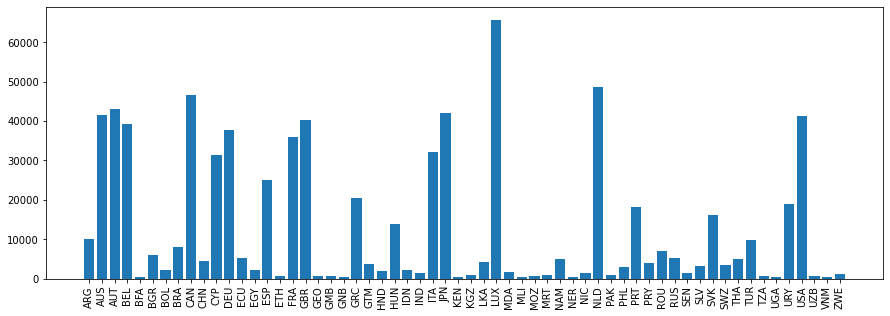

In [44]:
Countries = Affected_dataset.groupby('ISO')['GDP_per_capita'].mean()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)

plt.show()

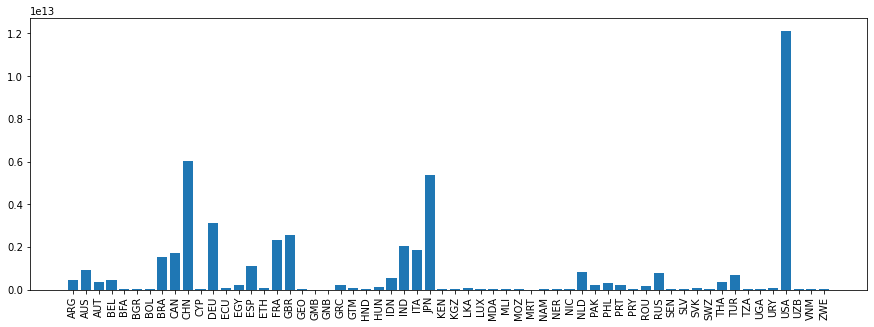

In [45]:
Countries = Affected_dataset.groupby('ISO')['GDP_absolut'].mean()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)

plt.show()

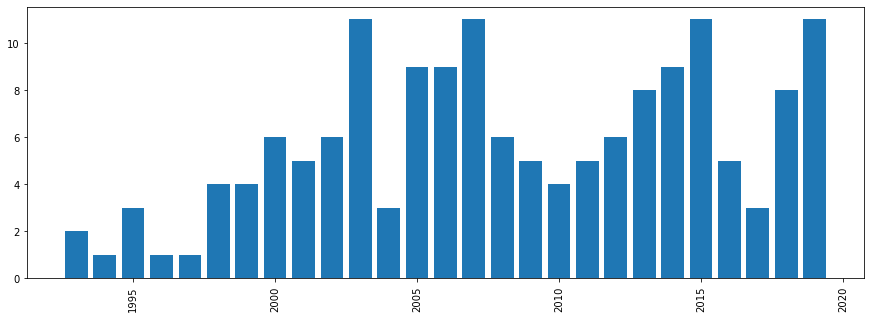

In [46]:
Year = Affected_dataset['Year'].value_counts()
plt.figure(figsize=(15,5))

plt.bar(Year.index,Year.values)
plt.xticks( rotation=90)

plt.show()

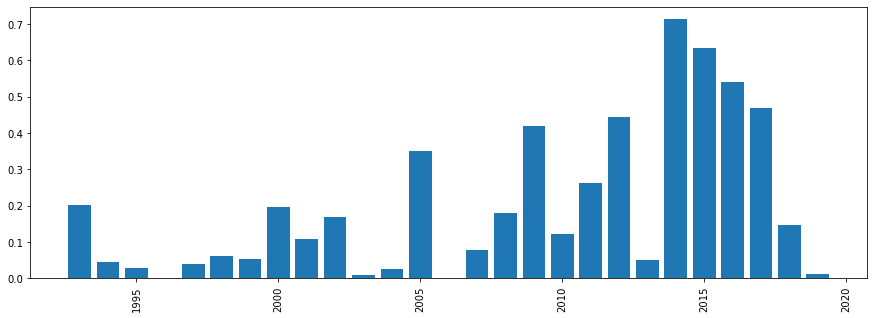

In [47]:
Year = Affected_dataset.groupby('Year')['Total Affected normalized'].sum()
plt.figure(figsize=(15,5))

plt.bar(Year.index,Year.values)
plt.xticks( rotation=90)

plt.show()

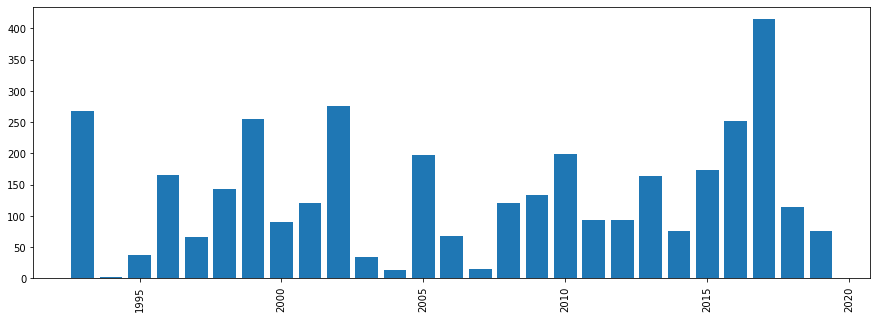

In [48]:
Year = Affected_dataset.groupby('Year')['Annua_freshwater_withdrawal_total'].mean()
plt.figure(figsize=(15,5))

plt.bar(Year.index,Year.values)
plt.xticks( rotation=90)

plt.show()

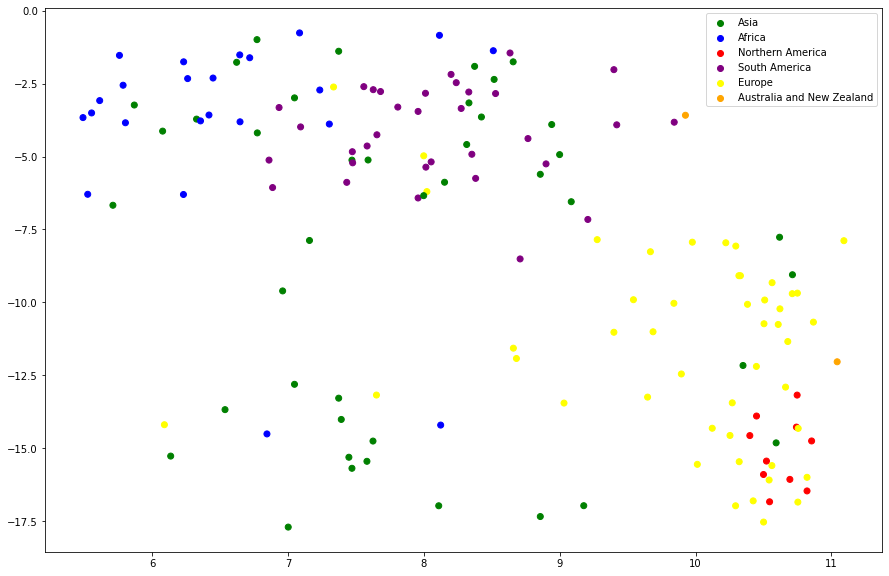

In [49]:

plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset ['GDP_per_capita'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.show()


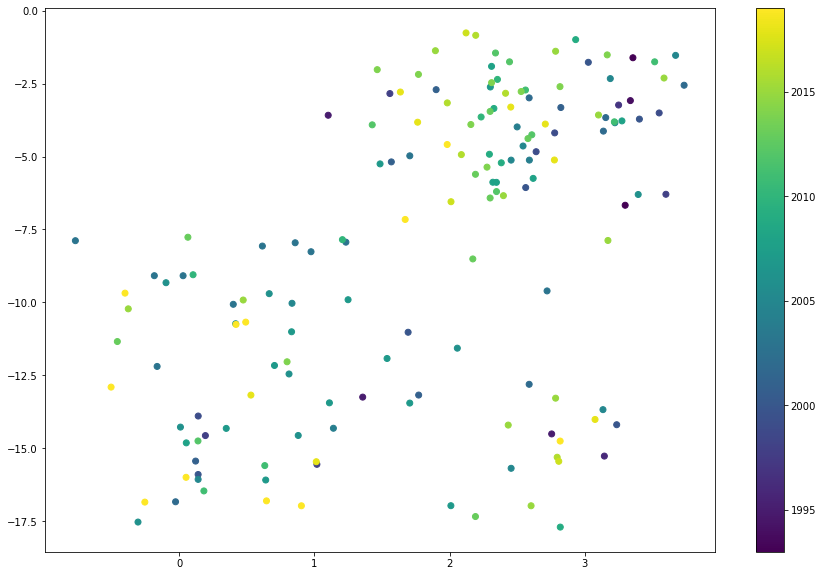

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_agriculture'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

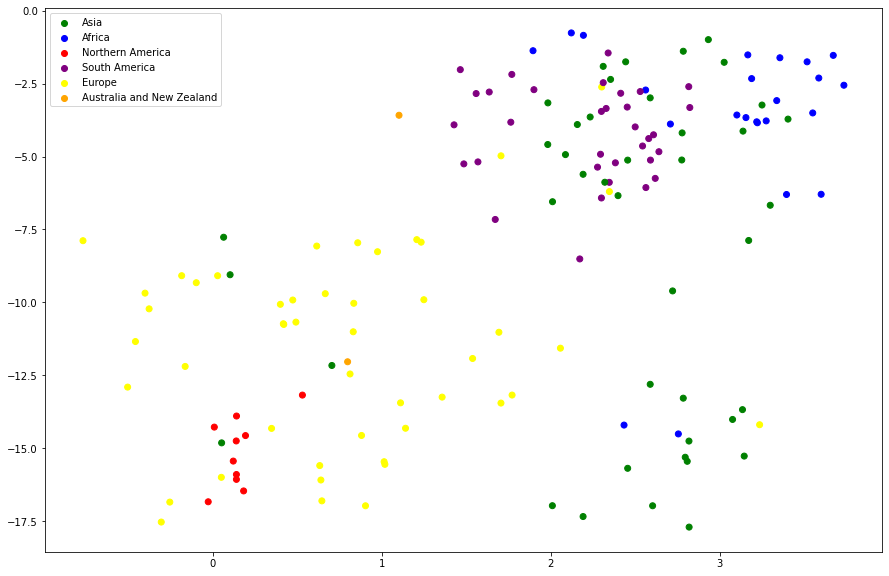

In [51]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_agriculture'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.show()

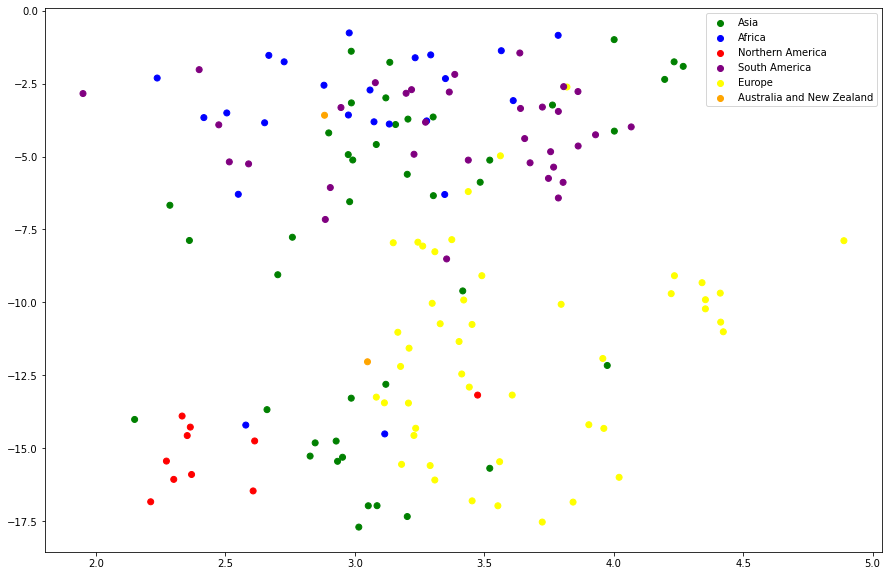

In [52]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_exports'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.show()

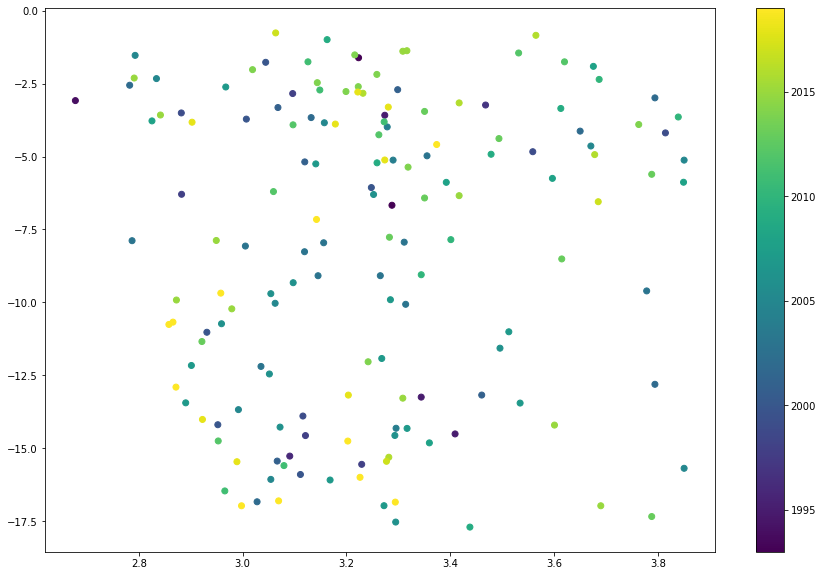

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_industry'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

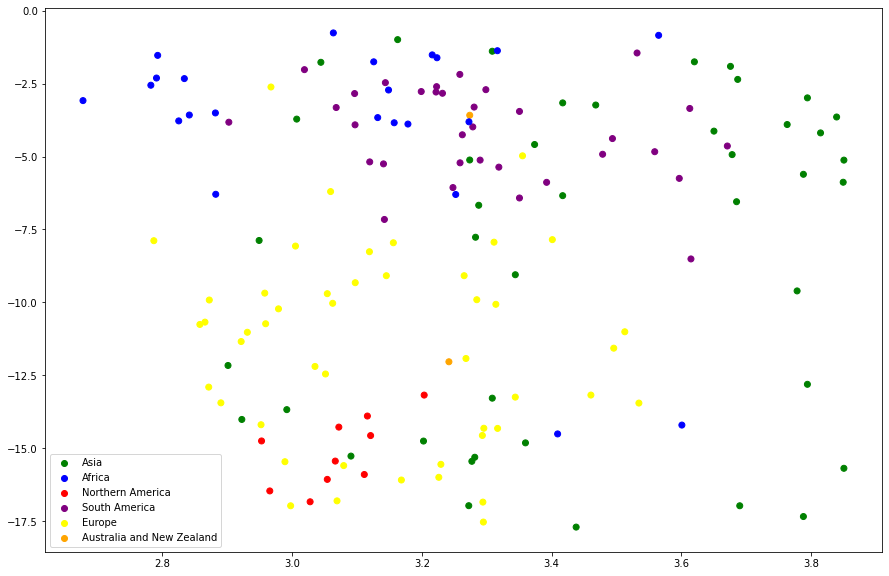

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_industry'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.show()

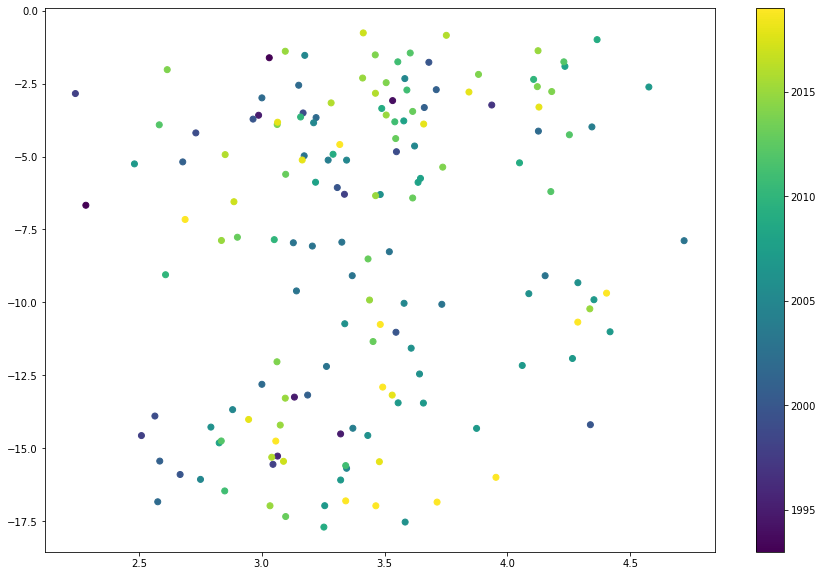

In [55]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Imports_percent_GDP'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

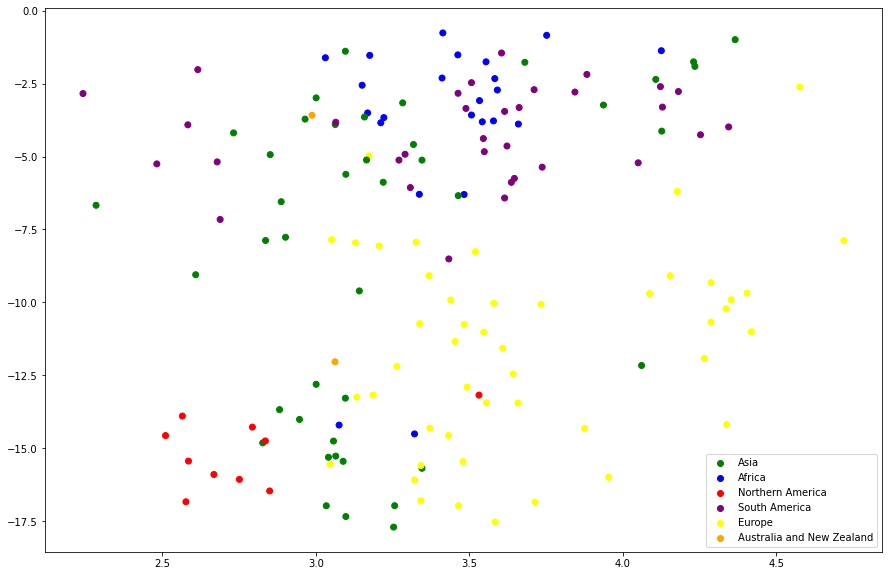

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Imports_percent_GDP'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.show()

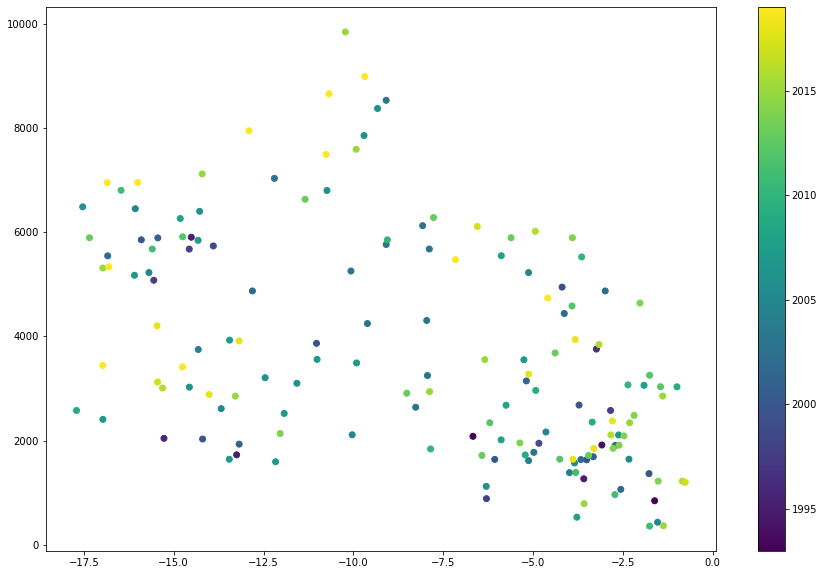

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),Affected_dataset [ 'Cerial_Yields'] ,c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

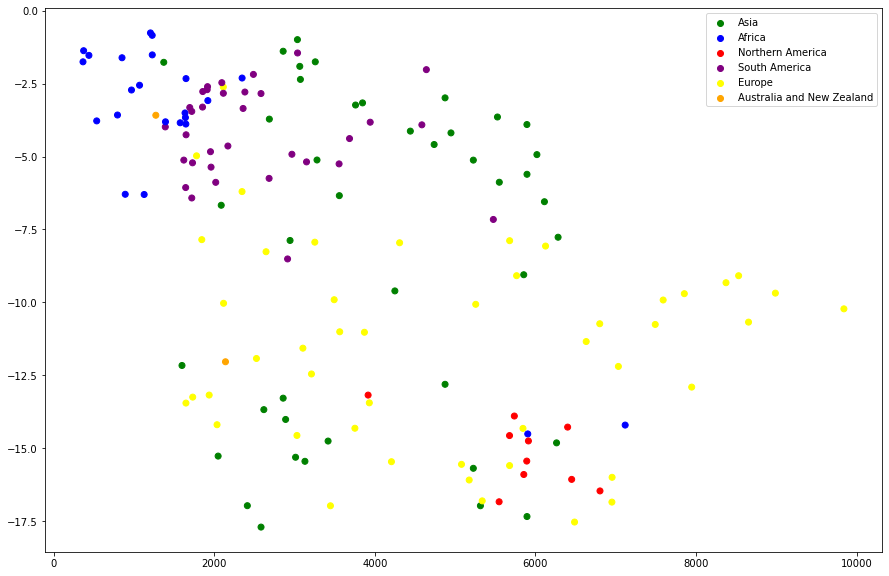

In [58]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Cerial_Yields'] ,np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.show()

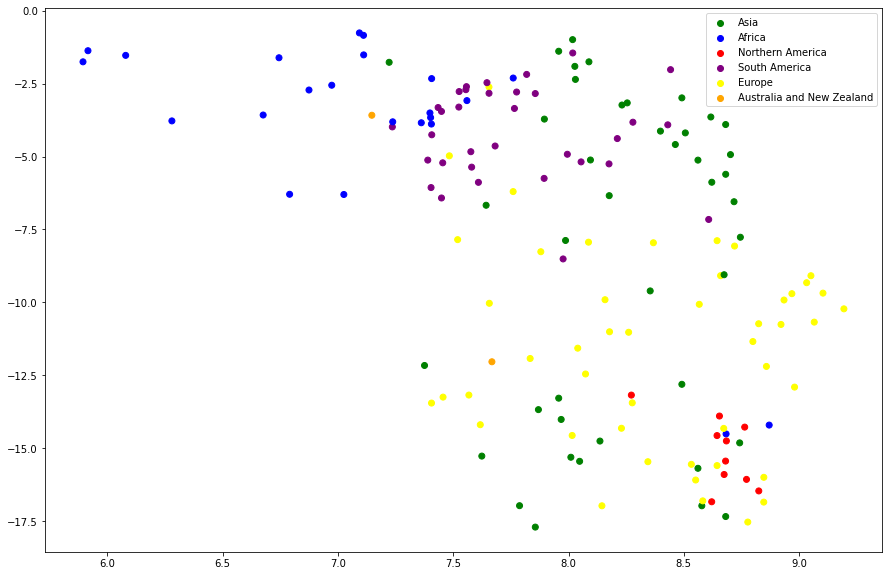

In [59]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Cerial_Yields'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.show()

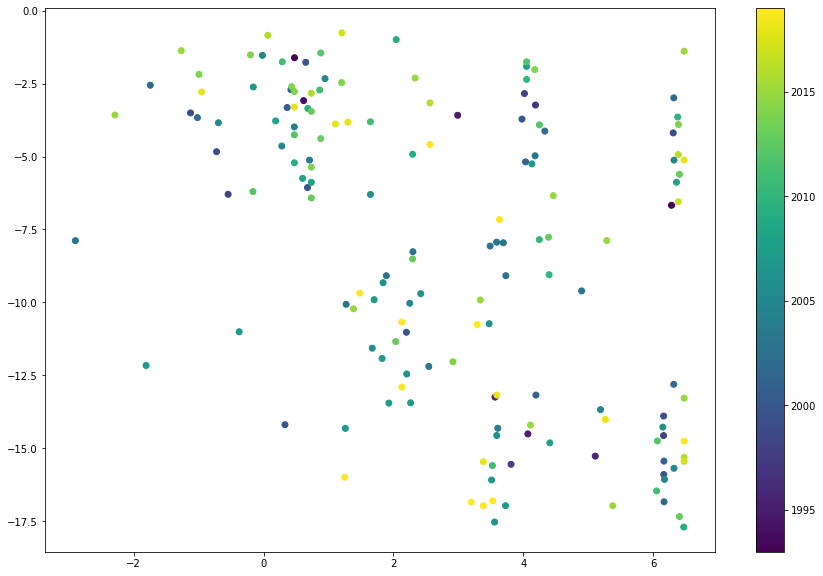

In [60]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Annua_freshwater_withdrawal_total'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

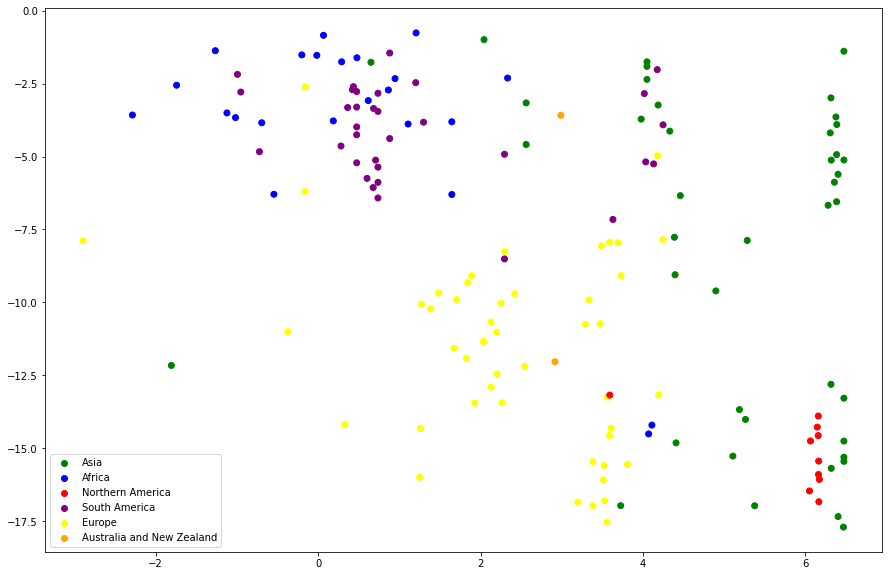

In [61]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Annua_freshwater_withdrawal_total'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.show()

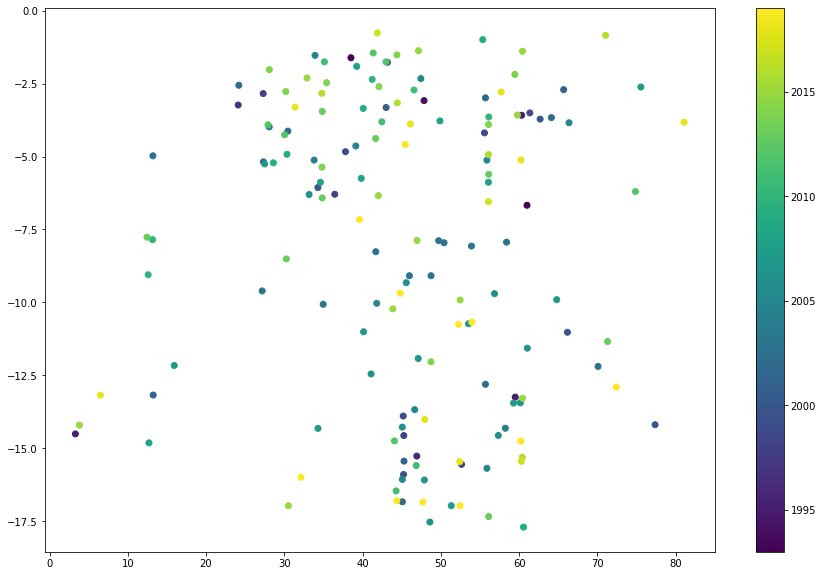

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Agricultural_Land'] ,np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

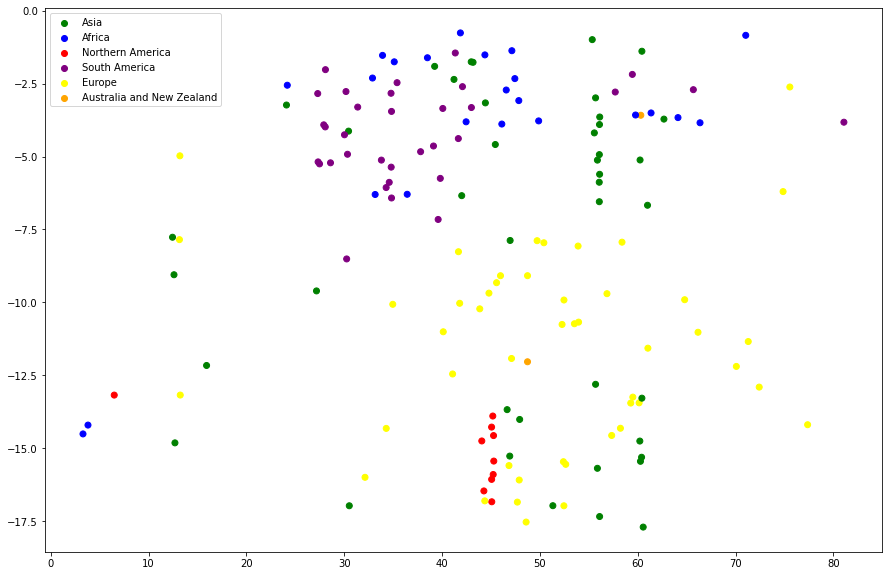

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Agricultural_Land'] ,np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.show()

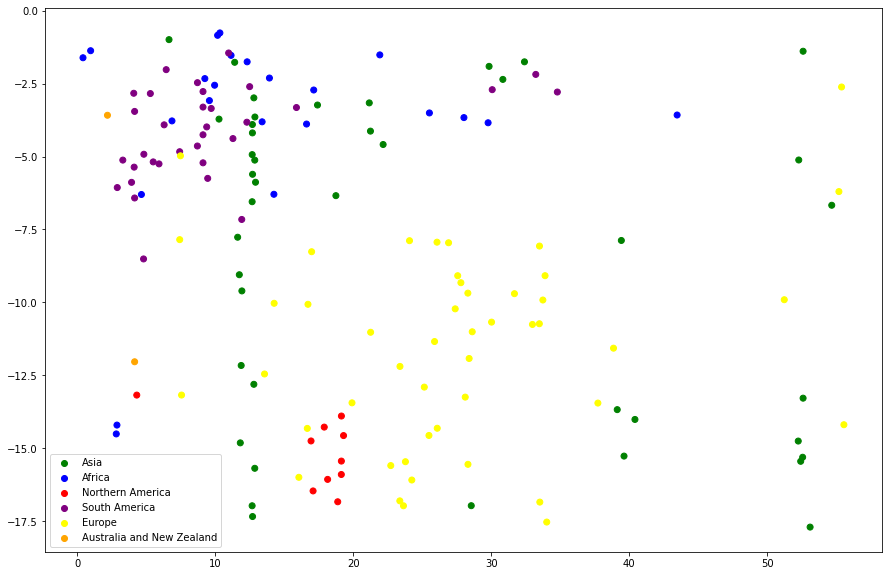

In [64]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Arable_Land_Percentage'] ,np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.show()

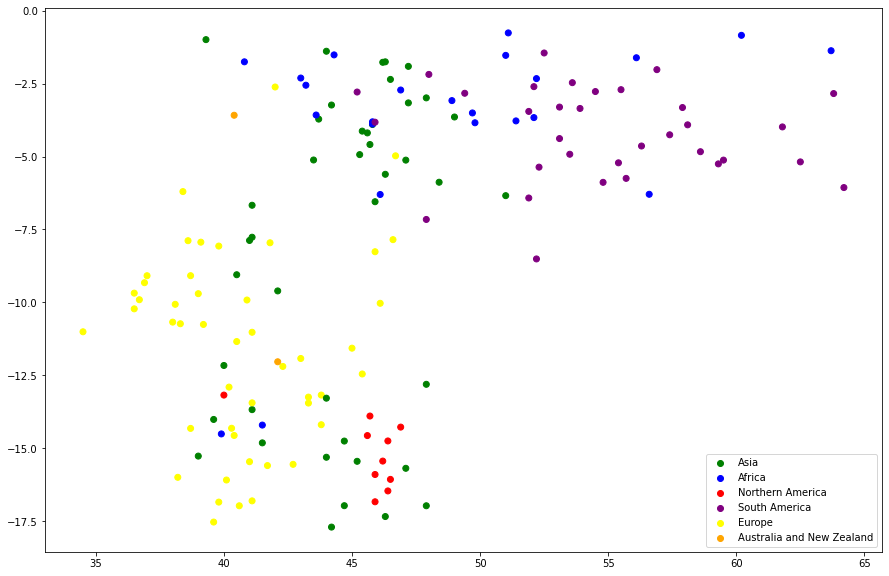

In [65]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'income_1_of_the_highest_20%'],np.log(Affected_dataset ['Total Affected normalized']) ,c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.show()

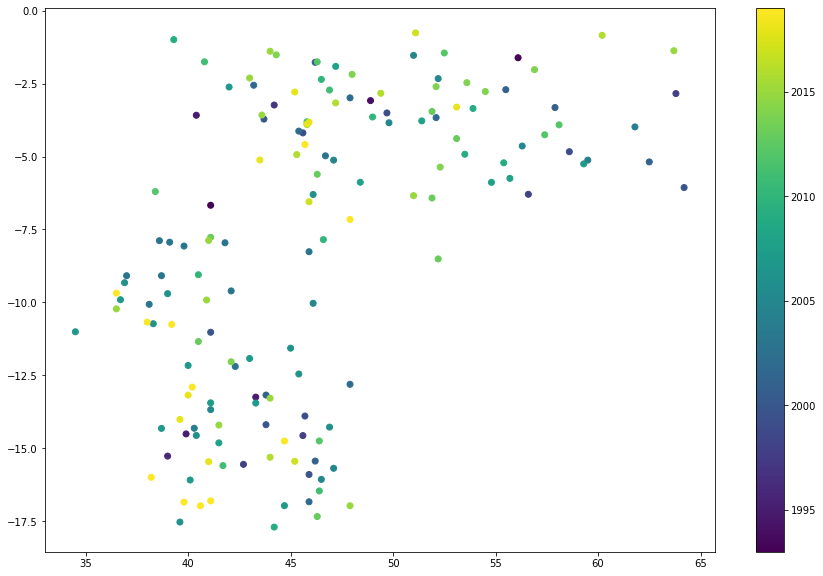

In [66]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'income_1_of_the_highest_20%'],np.log(Affected_dataset ['Total Affected normalized']) ,c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

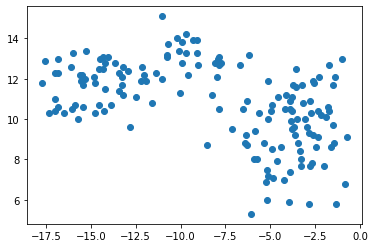

In [67]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),Affected_dataset [ 'income_2_of_the_second_20%'] )
plt.show()

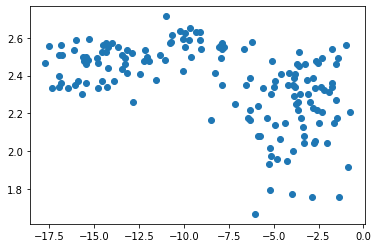

In [68]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),np.log(Affected_dataset [ 'income_2_of_the_second_20%'] ))
plt.show()

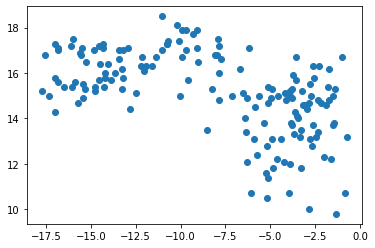

In [69]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),Affected_dataset [ 'income_3_of_the_third_20%'] )
plt.show()

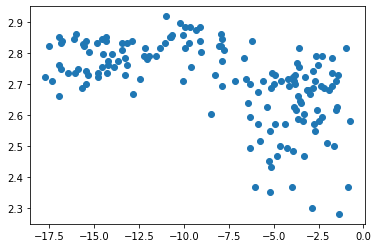

In [70]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),np.log(Affected_dataset [ 'income_3_of_the_third_20%'] ))
plt.show()

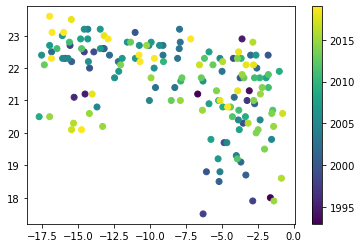

In [71]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),Affected_dataset [ 'income_4_of_the_fourth_20%'] ,c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

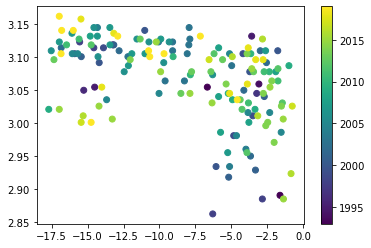

In [72]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),np.log(Affected_dataset [ 'income_4_of_the_fourth_20%'] ),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

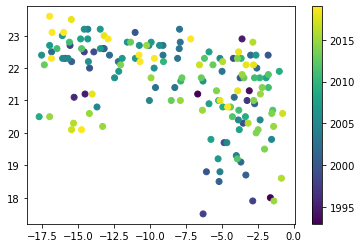

In [73]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),Affected_dataset [ 'income_4_of_the_fourth_20%'] ,c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

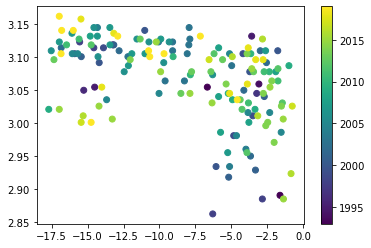

In [74]:
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),np.log(Affected_dataset [ 'income_4_of_the_fourth_20%'] ),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()

In [75]:

Financial_Dataset = pd.merge(Affected_dataset_messy,energy_consumption , on =['ISO','Year'])

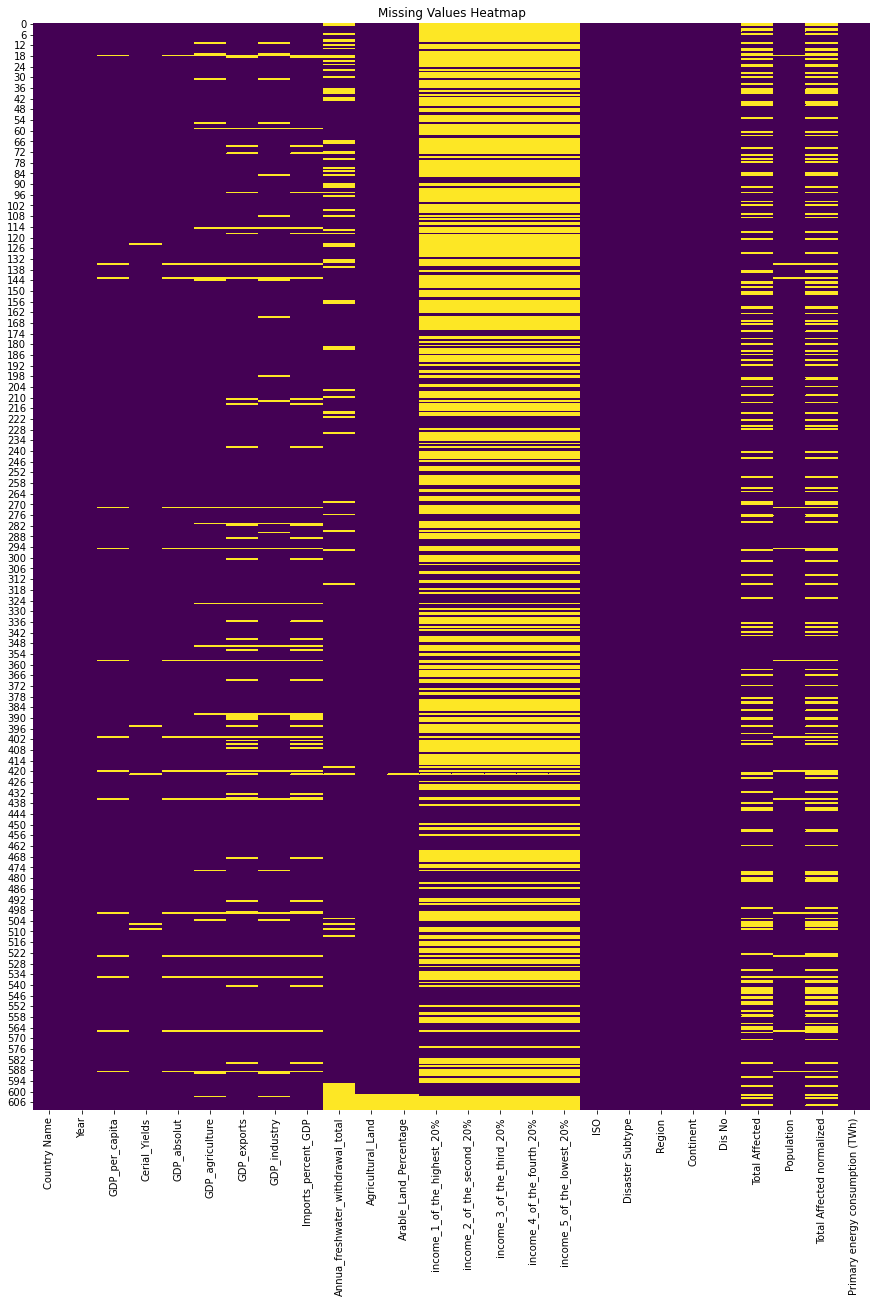

In [80]:
Financial_Dataset = Financial_Dataset.drop(['Country Code','Entity','Code'],axis=1)
mask = Financial_Dataset.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


<span style="font-size: 300%;">  __Datasets From here on__ </span>

<span style="font-size: 150%;">__Financial_Dataset__ Has all the data without removing any nan values 
<br>
__Affected_dataset__ Has the data but removed all the ros that have nan values
<br>
the following two cells spesify visually that

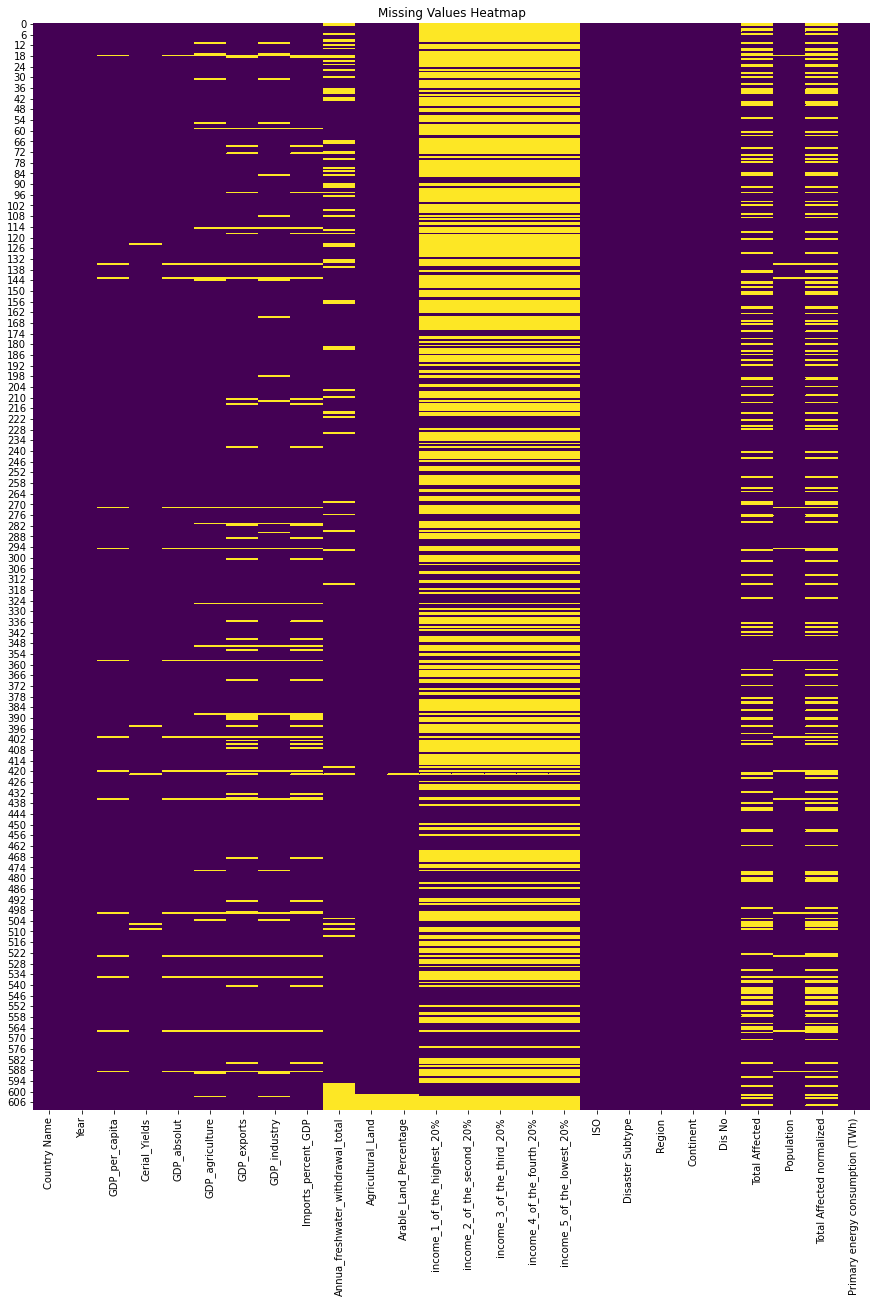

      Country Name  Year  GDP_per_capita  Cerial_Yields        GDP_absolut  \
0        Australia  1991       18860.582       1691.000   325986971195.354   
1            Chile  1991        2789.776       4050.900    37834793730.313   
2            China  1991         333.142       4237.300   383373318083.624   
3           Cyprus  1991        9696.100       1335.900     5770197348.485   
4           France  1991       21675.706       6536.200  1269276828275.782   
..             ...   ...             ...            ...                ...   
606           Iraq  2021        4775.377       2729.600   207889333724.138   
607     Kazakhstan  2021       10373.790       1049.000   197112255360.612   
608  United States  2021       70248.629       8268.000 23315080560000.000   
609  United States  2021       70248.629       8268.000 23315080560000.000   
610   South Africa  2021        7055.045       5124.700   419015018371.887   

     GDP_agriculture  GDP_exports  GDP_industry  Imports_percen

In [81]:
mask = Financial_Dataset.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
print (Financial_Dataset)

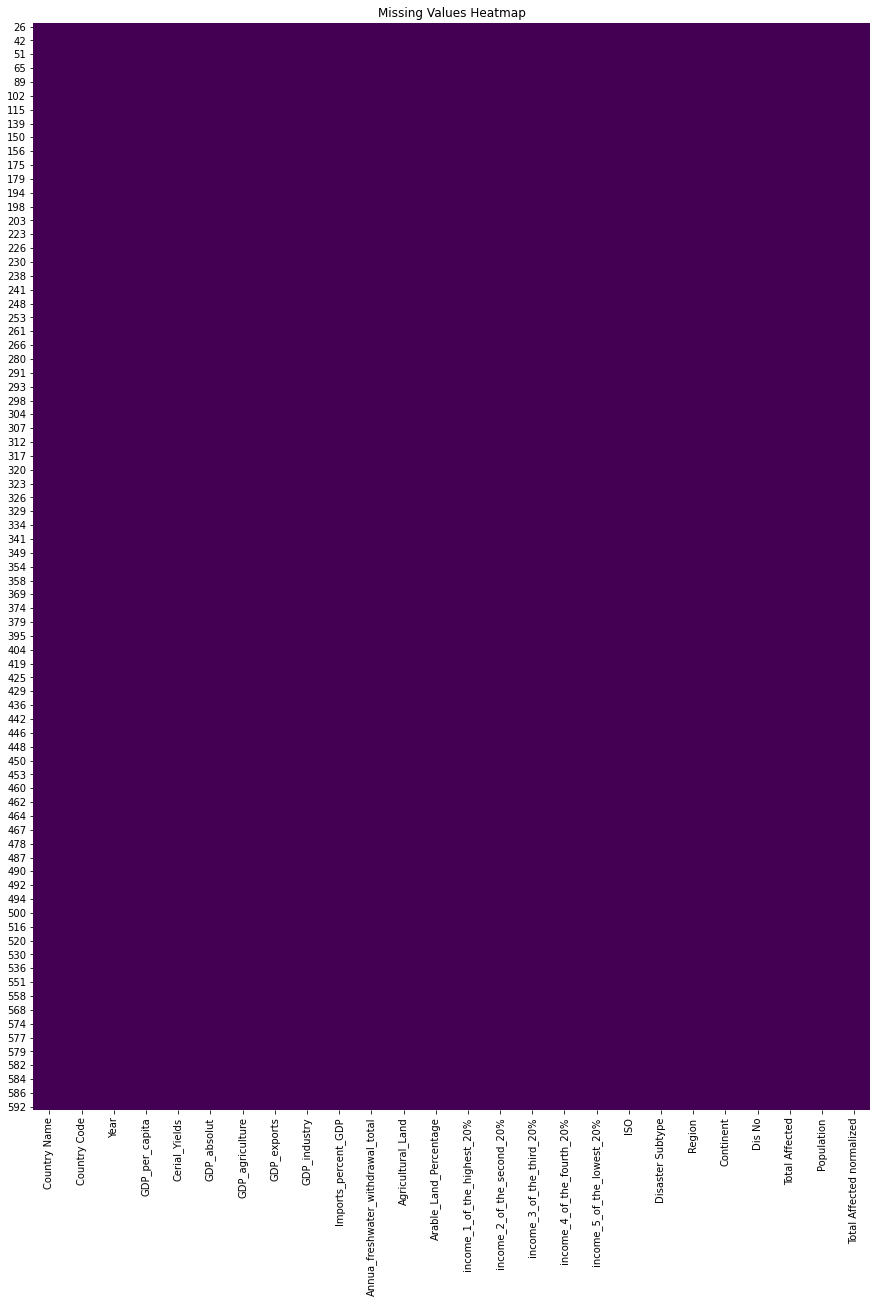

         Country Name Country Code  Year  GDP_per_capita  Cerial_Yields  \
26              India          IND  1993         301.501       2084.900   
28         Mauritania          MRT  1993         825.792        849.000   
42              Kenya          KEN  1994         273.522       1918.200   
48          Australia          AUS  1995       20446.720       1270.000   
51   Egypt, Arab Rep.          EGY  1995         937.543       5903.700   
..                ...          ...   ...             ...            ...   
584    United Kingdom          GBR  2019       42747.080       7946.000   
585             India          IND  2019        2047.233       3416.100   
586             Italy          ITA  2019       33673.751       5336.200   
590         Sri Lanka          LKA  2019        4082.695       4737.400   
592       Netherlands          NLD  2019       52476.273       8654.200   

          GDP_absolut  GDP_agriculture  GDP_exports  GDP_industry  \
26   279296022987.919         

In [82]:
mask = Affected_dataset.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
print (Affected_dataset)